# Playing with Krigging

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [2]:
# synthetic example
def f(x, y):
    return -np.exp(-(y-np.sin(x))**2)

In [3]:
# create ground truth grid
x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

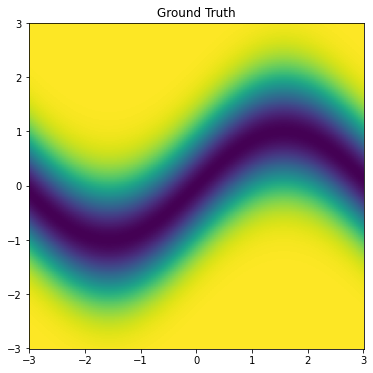

In [4]:
# color mesh map for ground truth
plt.figure(figsize=(6,6))
plt.pcolormesh(X, Y, Z, shading='auto')
plt.title('Ground Truth')
plt.show()

In [5]:
# Running a sample with 100 points to test how to work kriging
n = 100 
sample_x = x[np.random.choice(len(x), size=n, replace=False)]
sample_y = y[np.random.choice(len(y), size=n, replace=False)]
sample_z = f(sample_x, sample_y)

# Run ordinary kriging - note for the variogram model, both gaussian and spherical work for this dataset, but gaussian matches it much better
OK = OrdinaryKriging(sample_x, sample_y, sample_z, variogram_model="gaussian", enable_plotting=False)
#Now execute kriging to get the predicted values for areas with no data, run as grid to be able to plot
kriging_z_values, variance = OK.execute('grid', x, y)

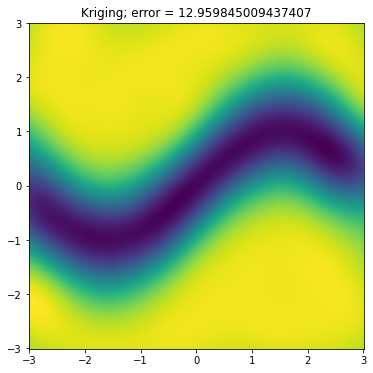

In [6]:
#Function to get the error
def get_error(predicted_values, actual_values):
    return np.linalg.norm(np.abs(np.subtract(predicted_values, actual_values)))


plt.figure(figsize=(6,6))
plt.pcolormesh(X, Y, kriging_z_values, shading='auto')
plt.title(f'Kriging; error = {get_error(kriging_z_values, Z)}')
plt.show()

In [7]:
# Function to run kriging with a sample size of n, returning the error
def get_kriging_error(n):
    sample_x = x[np.random.choice(len(x), size=n, replace=False)]
    sample_y = y[np.random.choice(len(y), size=n, replace=False)]
    sample_z = f(sample_x, sample_y)
    
    # Run ordinary kriging then execute with full dataset to get predictions
    OK = OrdinaryKriging(sample_x, sample_y, sample_z, variogram_model="gaussian", enable_plotting=False)
    kriging_z_values, variance = OK.execute('grid', x, y)
    
    #Now get the error from kriging and return it
    return get_error(kriging_z_values, Z)

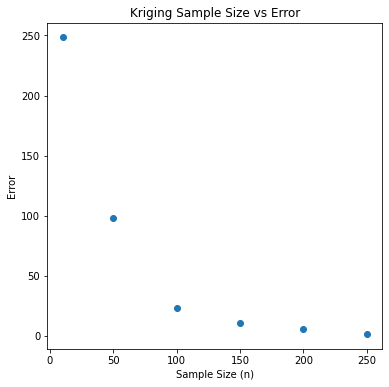

In [9]:
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Keeping sample sizes low as the memory overhead for anything higher seems to go out of control - froze my computer multiple times working this
sample_sizes = [10, 50, 100, 150, 200, 250]
errors = []
for sample in sample_sizes:
    errors.append(get_kriging_error(sample))
    
plt.figure(figsize=(6,6))
plt.scatter(sample_sizes, errors)
plt.xlabel("Sample Size (n)")
plt.ylabel("Error")
plt.title("Kriging Sample Size vs Error")
plt.show()